In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [3]:
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())
#tf.debugging.set_log_device_placement(False)

Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
mnist_data, mnist_info = tfds.load("mnist", as_supervised=True, with_info=True)
mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

assert isinstance(mnist_train, tf.data.Dataset)

def normalize_data(features, labels):
  return tf.cast(features, tf.float32) / 256., labels

mnist_train = mnist_train.map(normalize_data).batch(128)
mnist_test = mnist_test.map(normalize_data).batch(128)

In [5]:
val = next(tfds.as_numpy(mnist_train))

8
(128, 28, 28, 1)


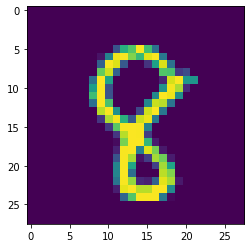

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.15625    0.875      0.98046875
 0.63671875 0.28125    0.91796875 0.96875    0.4140625  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [6]:
print(val[1][0])
print(val[0].shape)
plt.imshow(val[0][0, :, :, 0])
plt.show()
print(val[0][0, 14, : , 0])

In [7]:
def comp_and_train(model):
    model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=['accuracy'],
    )

    hist = model.fit(
      mnist_train,
      epochs=6,
      validation_data=mnist_test,
    )
    print(model.summary())

In [8]:
comp_and_train(models.Sequential([ 
  layers.Flatten(input_shape=(28, 28, 1)),
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
]))

Epoch 1/6
469/469 [==============================] - 74s 158ms/step - loss: 1.5772 - accuracy: 0.9017 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/6
469/469 [==============================] - 79s 168ms/step - loss: 1.5163 - accuracy: 0.9524 - val_loss: 1.5136 - val_accuracy: 0.9544
Epoch 3/6
469/469 [==============================] - 78s 166ms/step - loss: 1.5010 - accuracy: 0.9653 - val_loss: 1.5027 - val_accuracy: 0.9633
Epoch 4/6
469/469 [==============================] - 88s 187ms/step - loss: 1.4922 - accuracy: 0.9738 - val_loss: 1.4957 - val_accuracy: 0.9688
Epoch 5/6
469/469 [==============================] - 115s 246ms/step - loss: 1.4862 - accuracy: 0.9789 - val_loss: 1.4951 - val_accuracy: 0.9690
Epoch 6/6
469/469 [==============================] - 79s 169ms/step - loss: 1.4823 - accuracy: 0.9822 - val_loss: 1.4911 - val_accuracy: 0.9721
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape

In [9]:
comp_and_train(models.Sequential([ 
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax")
]))

Epoch 1/6
469/469 [==============================] - 79s 169ms/step - loss: 1.5625 - accuracy: 0.9116 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/6
469/469 [==============================] - 78s 167ms/step - loss: 1.4985 - accuracy: 0.9686 - val_loss: 1.4943 - val_accuracy: 0.9711
Epoch 3/6
469/469 [==============================] - 77s 164ms/step - loss: 1.4860 - accuracy: 0.9789 - val_loss: 1.4868 - val_accuracy: 0.9773
Epoch 4/6
469/469 [==============================] - 77s 165ms/step - loss: 1.4802 - accuracy: 0.9839 - val_loss: 1.4827 - val_accuracy: 0.9804
Epoch 5/6
469/469 [==============================] - 77s 165ms/step - loss: 1.4766 - accuracy: 0.9873 - val_loss: 1.4803 - val_accuracy: 0.9828
Epoch 6/6
469/469 [==============================] - 77s 165ms/step - loss: 1.4735 - accuracy: 0.9897 - val_loss: 1.4801 - val_accuracy: 0.9833
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shap